In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
from scipy.integrate import odeint

#Test de push

#Fonctions de conversion utiles
def s2day(t) :
    '''Conversion de t en seconde vers t en jours'''
    return t/(3600*24)

def s2year(t) :
    '''Conversion de t en seconde vers t en années'''
    return t/(3600*24*365)

In [2]:
#Constantes physiques
c = 3.e+8           #Vitesse de la lumière 
sigma = 5.67e-8     #constante de Stefan
a = 4*sigma/c

#Constantes pour le soleil
M_sun = 1.989e+30
R_sun = 696340e+3
L_sun = 3.827e+26


#Paramètre pour le terme de chauffage
A = 6.6e+42/M_sun   
alpha = 1.3

In [3]:
#Constantes du problème
M_ej = 1.e-2*M_sun  #Masse éjectée
v_exp = 0.15*c      #Vitesse d'expension 
R_0 = 1.e+4         #Rayon initial
kappa = 0.5         #Opacité

In [4]:
#Calcul des temps et longueurs caractéristiques
t_star = sqrt(3*M_ej*kappa/(4*pi*c*v_exp))
R_neb = sqrt(3*M_ej*kappa/(4*pi))
t_neb = R_neb/v_exp

print("Constantes caractéristiques du probleme :")
print("t* = " + str("%.2e"%t_star) + " s = " + str("%.2f"%s2day(t_star)) + " jours")
print("t_neb = " + str("%.2e"%t_neb) + " s = " + str("%.2f"%s2day(t_neb)) + " jours")
print("R_neb = " + str("%.2e"%R_neb) + " m = " + str("%.2f"%(R_neb/R_sun)) + " Rayons solaire")

Constantes caractéristiques du probleme :
t* = 4.19e+05 s = 4.85 jours
t_neb = 1.08e+06 s = 12.53 jours
R_neb = 4.87e+13 m = 69974.01 Rayons solaire


In [5]:
def R(t) :
    return v_exp*t 

def P(t) :
    return a*T(t)/3

def U(t) : 
    return 4*pi*a*pow(R(t),3)*pow(T(t),4)/3

def Ts(t) :
    return 
    
def L(t) :
    return 4*pi*pow(R(t),2)*sigma*pow(Ts(t),4)

def E_dot(t) :
    return A*M_ej*pow(t,-alpha)

### Equation d'évolution de l'ejecta dans la phase d'expansion libre : 
L'équation à résoudre est :

$t_{rad}\frac{dL}{dt} + L(t) = \dot E(t)$

Nous utiliserons odeint de numpy pour sa résolution numérique.

Text(13, 40000.0, '$t_{neb}$')

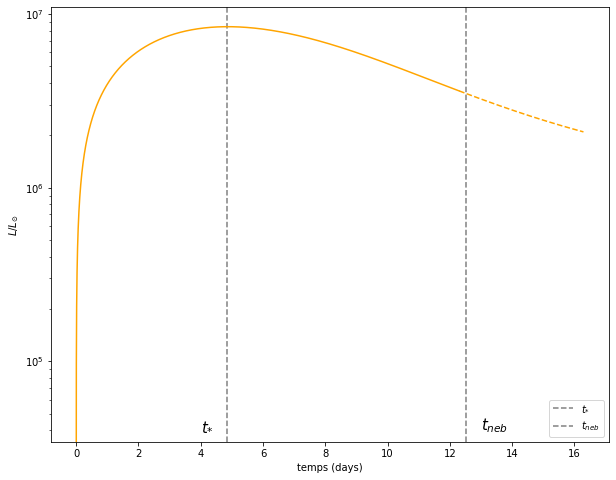

In [20]:
def model(L,t) :
    dLdt = (E_dot(t)-L)*t/pow(t_star,2)
    return dLdt

Nlim = 7550
t = np.linspace(1.e-6, 1.3*int(t_neb), num=10000)
L0 = 0
L = odeint(model, L0, t)

plt.figure(figsize=[10,8])
plt.yscale('log')
plt.xlabel('temps (days)')
plt.ylabel('$L/L_{\odot }$')
plt.axvline(x=s2day(t_star),color='gray',linestyle='--',label='$t_{*}$')
plt.axvline(x=s2day(t_neb),color='gray',linestyle='--',label='$t_{neb}$')
plt.plot(s2day(t[:Nlim]),L[:Nlim]/L_sun,color='orange')
plt.legend(loc="lower right")
plt.plot(s2day(t[Nlim:]),L[Nlim:]/L_sun,linestyle='--',color='orange')
plt.text(int(s2day(t_star)),4.e+4,'$t_{*}$',fontsize=15)
plt.text(int(s2day(t_neb)) + 1,4.e+4,'$t_{neb}$',fontsize=15)